<a href="https://colab.research.google.com/github/ranjithdurgunala/ML-LAB-2025-2026/blob/main/Data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data processing**

Data processing means cleaning, transforming, and organizing raw data into a usable format for analysis and machine learning.

Data Processing Techniques

 Handling Missing Values

 Removing duplicates

 Correcting data types

 Encoding Categorical Data

 Feature Scaling, Adding new features

 Removing Outliers

 Splitting Data for Training and Testing

 Correlation analysis

In [ ]:
import pandas as pd
data=pd.read_csv('Name-Age-Gender-Marks-City.csv')
data.head()

,Name,Age,Gender,Marks,City
0,Alice,18.0,F,85.0,London
1,Bob,NaN,M,90.0,New York
2,Cathy,19.0,F,95.0,NaN
3,David,17.0,M,72.0,Sydney
4,Eva,18.0,F,NaN,London


**Handling Missing Values**

Missing values are empty data entries. These can be filled (imputation) or dropped.

In [ ]:
data.fillna({
    'Age':data['Age'].mean(),
    'Marks':data['Marks'].mean(),
    'City':'Unknown'
},inplace=True)

print(data)

    Name   Age Gender  Marks      City
0  Alice  18.0      F   85.0    London
1    Bob  18.0      M   90.0  New York
2  Cathy  19.0      F   95.0   Unknown
3  David  17.0      M   72.0    Sydney
4    Eva  18.0      F   85.5    London


**Removing duplicates**

Removing duplicates is an important data cleaning step to ensure each data record is unique and does not skew analysis or modeling.

What are Duplicates?
Duplicates are repeated rows or records in your dataset that have the exact same values in all or selected columns.

**Why Remove Duplicates?**

Prevents bias from repeated entries

Improves accuracy of models and summaries

Saves storage and processing time

In [14]:
import pandas as pd

# Create example data including duplicates
data = {
    'Name': ['Alice', 'Bob', 'Alice'],
    'Age': [18, 18, 18],
    'Gender': ['F', 'M', 'F'],
    'Marks': [85, 90, 85]
}

df = pd.DataFrame(data)

print("Original Data:")
print(df)

# Remove duplicates across all columns
df_no_duplicates = df.drop_duplicates()

print("\nAfter Removing Duplicates:")
print(df_no_duplicates)

Original Data:
    Name  Age Gender  Marks
0  Alice   18      F     85
1    Bob   18      M     90
2  Alice   18      F     85

After Removing Duplicates:
    Name  Age Gender  Marks
0  Alice   18      F     85
1    Bob   18      M     90


**Correcting data types**

Correcting data types ensures each column in your dataset uses the appropriate format (integers, floats, strings, etc.), which is essential for accurate analysis and modeling.

Why Correct Data Types?

Ensures data is interpreted correctly

Prevents errors in calculations and modeling

Speeds up processing and saves memory

**How to Check Data Types in pandas**

This shows current types (object means string).

In [15]:
import pandas as pd

df = pd.DataFrame({
    'Name': ['John', 'Alice'],
    'Age': ['25', '30'],
    'Salary': ['50000', '55000']
})
print(df.dtypes)

Name      object
Age       object
Salary    object
dtype: object


**1. Using astype()**

Convert specific columns to desired types:

In [19]:
df['Age'] = df['Age'].astype(int)        # To integer
df['Salary'] = df['Salary'].astype(float) # To float
print(df.dtypes)

Name       object
Age         int64
Salary    float64
dtype: object


**2. Using pd.to_numeric() (handles errors)**


If your data may have invalid values ((numbers and words)) , force conversion and set errors to “NaN”:

In [17]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

**Encoding Categorical Data**

Convert text categories into numbers for analysis.

In [ ]:
data['Gender']=data['Gender'].map({'F':0,'M':1})
print(data)

    Name   Age  Gender  Marks      City
0  Alice  18.0       0   85.0    London
1    Bob  18.0       1   90.0  New York
2  Cathy  19.0       0   95.0   Unknown
3  David  17.0       1   72.0    Sydney
4    Eva  18.0       0   85.5    London


Use one-hot encoding for city

In [ ]:
data = pd.get_dummies(data, columns=['City'])
print(data)

    Name   Age  Gender  Marks  City_London  City_New York  City_Sydney  \
0  Alice  18.0       0   85.0         True          False        False   
1    Bob  18.0       1   90.0        False           True        False   
2  Cathy  19.0       0   95.0        False          False        False   
3  David  17.0       1   72.0        False          False         True   
4    Eva  18.0       0   85.5         True          False        False   

   City_Unknown  
0         False  
1         False  
2          True  
3         False  
4         False  


**Feature Scaling**

Brings all numeric data to the same scale (Helpful for some algorithms).

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['Marks'] = scaler.fit_transform(data[['Marks']])
print(data)

    Name   Age  Gender     Marks  City_London  City_New York  City_Sydney  \
0  Alice  18.0       0  0.565217         True          False        False   
1    Bob  18.0       1  0.782609        False           True        False   
2  Cathy  19.0       0  1.000000        False          False        False   
3  David  17.0       1  0.000000        False          False         True   
4    Eva  18.0       0  0.586957         True          False        False   

   City_Unknown  
0         False  
1         False  
2          True  
3         False  
4         False  


**Creating new features**

Creating new features—called feature engineering—means adding extra columns to your dataset based on existing data. These new features can help your analysis or machine learning models perform better.

**Why Create New Features?**

*Capture more information:* Sometimes, combinations or transformations of columns reveal hidden patterns.

*Improve accuracy*: Useful, well-crafted features help models make better predictions.

*Simplify modeling*: New features can make patterns clearer and easier for humans or algorithms to spot.

In [21]:
import pandas as pd
data = {
    'Name': ['Alice', 'Bob', 'Cathy','David'],
    'Age': [18, 20, 22,19],
    'Gender': ['F', 'M', 'F','M'],
    'Marks': [85, 90, 78,88]
}
df=pd.DataFrame(data)
print(df)

    Name  Age Gender  Marks
0  Alice   18      F     85
1    Bob   20      M     90
2  Cathy   22      F     78
3  David   19      M     88


**1. New Feature: Grade (based on Marks)**

We can categorize marks into letter grades.

In [22]:
def grade(marks):
    if marks >= 85:
        return 'A'
    elif marks >= 70:
        return 'B'
    else:
        return 'C'

df['Grade'] = df['Marks'].apply(grade)

**2. New Feature: Age Group (from Age)**

Group ages into categories like 'Teen', 'Young Adult', 'Adult':

In [24]:
bins = [0, 18, 21, 100]
labels = ['Teen', 'Young Adult', 'Adult']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
print(df)

    Name  Age Gender  Marks Grade    Age Group
0  Alice   18      F     85     A         Teen
1    Bob   20      M     90     A  Young Adult
2  Cathy   22      F     78     B        Adult
3  David   19      M     88     A  Young Adult


**Removing Outliers**

Outliers are values that are much higher or lower than the rest. Here’s how to remove marks below 60 or above 100:

In [ ]:
data=pd.read_csv('Name-Age-Gender-Marks-City.csv')
data = data[(data['Marks'] >= 60) & (data['Marks'] <= 100)]
print(data)

    Name   Age Gender  Marks      City
0  Alice  18.0      F   85.0    London
1    Bob   NaN      M   90.0  New York
2  Cathy  19.0      F   95.0       NaN
3  David  17.0      M   72.0    Sydney


**Splitting Data for Training and Testing**

Divide data into two sets—one for training your model, one for testing it.

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)
print("Train Data:\n", train)
print("Test Data:\n", test)

Train Data:
     Name   Age Gender  Marks      City
1    Bob   NaN      M   90.0  New York
0  Alice  18.0      F   85.0    London
3  David  17.0      M   72.0    Sydney
4    Eva  18.0      F    NaN    London
Test Data:
     Name   Age Gender  Marks City
2  Cathy  19.0      F   95.0  NaN


**Correlation Analysis?**

Correlation analysis is a statistical technique used to measure the relationship (how strongly and in what direction) two numeric variables are related.

The result is called the correlation coefficient (usually represented as "r"), which ranges from -1 to +1:

+1: Perfect positive correlation (both increase together)

0: No correlation

-1: Perfect negative correlation (one goes up, other goes down)

Important: Correlation does NOT mean causation. Two things moving together doesn't prove one causes the other

In [12]:
import pandas as pd

# Example data
data = {
    'Age': [18, 21, 19, 25, 30, 22, 23, 20],
    'Hours_Study': [2, 5, 3, 8, 10, 6, 7, 4],
    'Marks': [55, 80, 60, 88, 95, 70, 78, 65]
}
df = pd.DataFrame(data)

# Calculate correlation matrix
corr_matrix = df.corr()
print(corr_matrix)


                  Age  Hours_Study     Marks
Age          1.000000     0.970806  0.923392
Hours_Study  0.970806     1.000000  0.949103
Marks        0.923392     0.949103  1.000000


**Key Points**

Use df.corr() in pandas to quickly check correlations between all numeric columns.

A value close to 1 or -1 indicates a strong relationship; near 0 means weak or no linear relationship.

Always plot your data to check for outliers and non-linear relationships, as correlation only measures straight-line (linear) association.

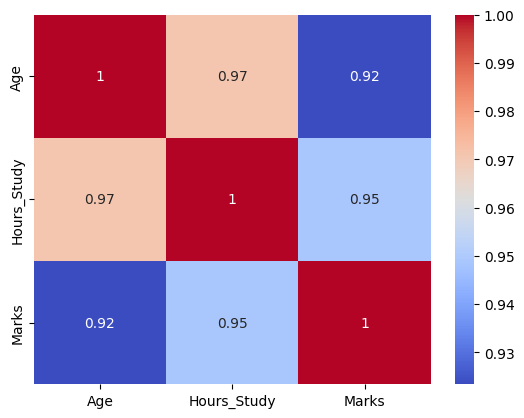

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()